In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.insert(0, os.path.abspath('src/'))
import analysis_utils as au

## Build big heatmap

In [2]:
df_100_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_100_b.csv')
df_100_2_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_100_2_b.csv')
df_10_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_50_b.csv')
df_test_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_50_2_b.csv') 
df_75_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_75_b.csv')
df_75_2_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_75_2_b.csv') 
df_best_100_4_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_100_4_b.csv')
df_best_75_4_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_75_4_b.csv')
df_best_50_4_b = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/final_dataframes/df_50_4_b.csv')

In [5]:
df_100_b

,Unnamed: 0,track_id1,track_id2,count,iou,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,seq,iouw
0,6,9,7,4,0.266667,1.0,0.0,0,1,1.066667
1,26,101,218,6,0.300000,1.0,0.0,0,1,1.800000
2,31,120,3,6,0.206897,1.0,0.0,0,1,1.241379
3,0,0,0,2,0.666667,4.0,0.0,4,4,1.333333
4,4,5,3,8,0.296296,4.0,0.0,4,4,2.370370
...,...,...,...,...,...,...,...,...,...,...
8658,21,14,137,29,0.743590,4.0,6.0,2,3,21.564103
8659,23,15,7,12,0.631579,4.0,6.0,2,3,7.578947
8660,31,31,210,20,0.500000,4.0,6.0,2,3,10.000000
8661,33,32,75,15,0.576923,4.0,6.0,2,3,8.653846


In [4]:
best_100_b = df_100_b[(df_100_b.track_cost_cutoff == 3.0) & (df_100_b.gap_closing_cost_cutoff == 5.0) & (df_100_b.gap_closing_max_frame_count == 3)].copy(deep=True)
best_100_b['concentration'] = [100]*len(best_100_b)
best_50_b = df_10_b[(df_10_b.track_cost_cutoff == 3.0) & (df_10_b.gap_closing_cost_cutoff == 7.0) & (df_10_b.gap_closing_max_frame_count == 3)].copy(deep=True)
best_50_b['concentration'] = [50]*len(best_50_b)
best_75_b = df_75_b[(df_75_b.track_cost_cutoff == 2.0) & (df_75_b.gap_closing_cost_cutoff == 5.0) & (df_75_b.gap_closing_max_frame_count == 2)].copy(deep=True)
best_75_b['concentration'] = [75]*len(best_75_b)

In [6]:
df_comb_b = pd.concat([best_100_b,best_50_b,best_75_b])[['iou','concentration']].reset_index(drop=True)

In [3]:
best_100_2 = df_100_2_b[(df_100_2_b.track_cost_cutoff == 3.0) & (df_100_2_b.gap_closing_cost_cutoff == 1.5) & (df_100_2_b.gap_closing_max_frame_count == 2)].copy(deep=True)
best_100_2['concentration'] = [100]*len(best_100_2)
best_50_2 = df_test_b[(df_test_b.track_cost_cutoff == 2.0) & (df_test_b.gap_closing_cost_cutoff == 9.0) & (df_test_b.gap_closing_max_frame_count == 4)].copy(deep=True)
best_50_2['concentration'] = [50]*len(best_50_2)
best_75_2 = df_75_2_b[(df_75_2_b.track_cost_cutoff == 1.0) & (df_75_2_b.gap_closing_cost_cutoff == 2.0) & (df_75_2_b.gap_closing_max_frame_count == 3)].copy(deep=True)
best_75_2['concentration'] = [75]*len(best_75_2)

In [5]:
best_100_4 = df_best_100_4_b[(df_best_100_4_b.track_cost_cutoff == 1.0) & (df_best_100_4_b.gap_closing_cost_cutoff == 5.0) & (df_best_100_4_b.gap_closing_max_frame_count == 4)].copy(deep=True)
best_100_4['concentration'] = [100]*len(best_100_4)
best_50_4 = df_best_50_4_b[(df_best_50_4_b.track_cost_cutoff == 1.0) & (df_best_50_4_b.gap_closing_cost_cutoff == 3.0) & (df_best_50_4_b.gap_closing_max_frame_count == 3)].copy(deep=True)
best_50_4['concentration'] = [50]*len(best_50_4)
best_75_4 = df_best_75_4_b[(df_best_75_4_b.track_cost_cutoff == 2.0) & (df_best_75_4_b.gap_closing_cost_cutoff == 3.0) & (df_best_75_4_b.gap_closing_max_frame_count == 3)].copy(deep=True)
best_75_4['concentration'] = [75]*len(best_75_4)

In [7]:
df_comb_2_b = pd.concat([best_100_2,best_50_2,best_75_2]).reset_index(drop=True)
df_comb_2_b = df_comb_2_b[['iou','concentration']]

In [8]:
df_comb_4_b = pd.concat([best_100_4,best_50_4,best_75_4]).reset_index(drop=True)
df_comb_4_b = df_comb_4_b[['iou','concentration']]

In [9]:
df_comb_4_b['dt'] = [4]*len(df_comb_4_b)

In [10]:
df_comb_2_b['dt'] = [2]*len(df_comb_2_b)

In [11]:
df_comb_b['dt'] = [10]*len(df_comb_b)

In [12]:
df_plot = pd.concat([df_comb_b,df_comb_2_b,df_comb_4_b])

In [13]:
a = df_plot.groupby(['concentration','dt']).mean().unstack(level=0)

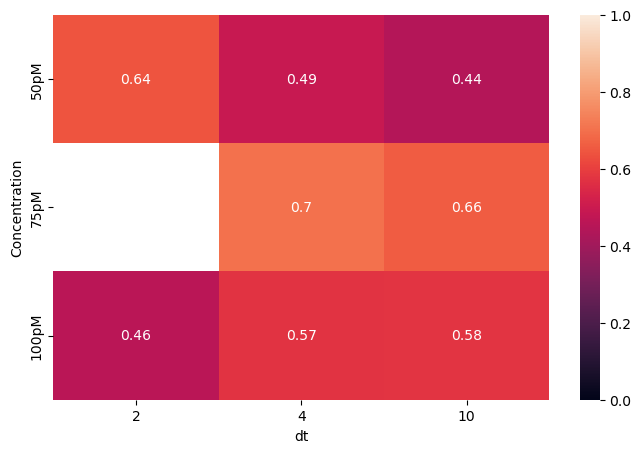

In [14]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=a.T,vmin=0,vmax=1,annot=True,ax=ax)
ax.set_yticks(ax.get_yticks(),labels=['50pM','75pM','100pM'])
ax.set_ylabel('Concentration')
# plt.savefig('plots/heatmap_benchmark.png',dpi=300,bbox_inches='tight')
plt.show()

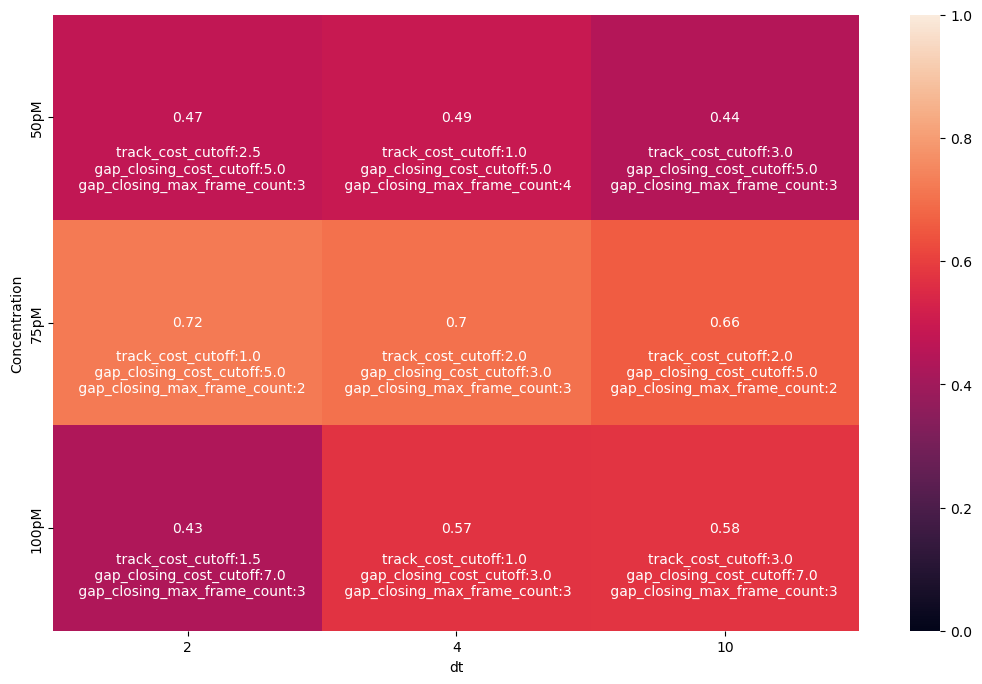

In [76]:
fig,ax = plt.subplots(figsize=(13,8))
sns.heatmap(data=a.T,vmin=0,vmax=1,annot=True,ax=ax)
ax.set_yticks(ax.get_yticks(),labels=['50pM','75pM','100pM'])
ax.set_ylabel('Concentration')
# plt.savefig('plots/heatmap_benchmark.png',dpi=300,bbox_inches='tight')


## text 
text = [1.5,7.0,3,1.0,5.0,2,2.5,5.0,3,1.0,3.0,3,2.0,3.0,3,1.0,5.0,4,3.0,7.0,3,2.0,5.0,2,3.0,5.0,3]
t = 0
g = 1
m = 2
for j in [0.17,0.5,0.83]: #x
    for b in [0.09,0.42,0.75]: #y
        ax.text(j, b, f'track_cost_cutoff:{text[t]} \n gap_closing_cost_cutoff:{text[g]} \n gap_closing_max_frame_count:{text[m]}', 
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,fontsize=10,c='white')
        t += 3
        g += 3
        m += 3
plt.savefig('plots/heatmap_benchmark.png',dpi=300,bbox_inches='tight')

plt.show()